In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from func_maps import readMaps
from func_stat import *
from func_visualizations import *
from os.path import join

### Parameters, filenames and directories
<a id='params'>#params</a>

In [4]:
### Files and directories ###
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\datasets'
#dirSOM=r'/mnt/Data/Work/Sources/COSMOS/CatalogsFromWorkingPC'
fileTest=r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'
test=pd.read_csv(join(dirCat,fileTest))

(-0.1, 0.1)

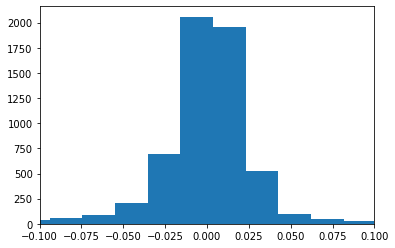

In [16]:
plt.hist(test['resid_ML'],bins=60)
plt.xlim(-0.1,0.1)

In [17]:
test['resid_ML'].std()

0.04778022672312442

In [20]:
print(statResid(test,'resid_ML'))

{'Num objects': 5967, 'Std': 0.048, 'NMAD': 0.019, 'Mean': -0.0023, '% outl_15': 1.64}


In [19]:
minLim=test['resid_ML'].mean()-test['resid_ML'].std()
maxLim=test['resid_ML'].mean()+test['resid_ML'].std()
t=test[(test['resid_ML']>=minLim) & (test['resid_ML']<=maxLim)]
print(statResid(t,'resid_ML'))

{'Num objects': 5422, 'Std': 0.018, 'NMAD': 0.017, 'Mean': 0.0012, '% outl_15': 0.0}


In [28]:
t=test[(test['trainMapOccupation']>5) & (test['specZ_outlCoeff'].abs()<=1)]
print(statResid(t,'resid_ML'))

{'Num objects': 3761, 'Std': 0.022, 'NMAD': 0.016, 'Mean': -0.0002, '% outl_15': 0.05}


In [23]:
minLim=test['resid_SED'].mean()-test['resid_SED'].std()
maxLim=test['resid_SED'].mean()+test['resid_SED'].std()
t=test[(test['resid_SED']>=minLim) & (test['resid_SED']<=maxLim)]
print(statResid(t,'resid_SED'))

{'Num objects': 5762, 'Std': 0.021, 'NMAD': 0.01, 'Mean': 0.0015, '% outl_15': 0.0}


In [27]:
t=test[(test['trainMapOccupation']>5) & (test['photoZ_SED_outlCoeff'].abs()<=1)& (test['specZ_outlCoeff'].abs()<=1)]
print(statResid(t,'resid_SED'))

{'Num objects': 3253, 'Std': 0.016, 'NMAD': 0.009, 'Mean': 0.0018, '% outl_15': 0.0}


### Compare resid distributions for ML and SED fitting ###

In [53]:
from numpy import linspace as lspace

In [79]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

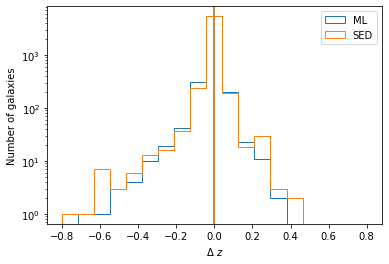

In [81]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[(d['resid_ML']<=limVal) & (d['resid_ML']>=-limVal)]
d=d[(d['resid_SED']<=limVal)&(d['resid_SED']>=-limVal)]
plt.hist(d['resid_ML'],bins=bins,histtype='step',label='ML')
plt.axvline(d['resid_ML'].mean(),color=colors[0])
plt.hist(d['resid_SED'],bins=bins,histtype='step',label='SED')
plt.axvline(d['resid_SED'].mean(),color=colors[1])
plt.yscale('log')
plt.xlabel('$\Delta~z$')
plt.ylabel('Number of galaxies')
plt.legend()

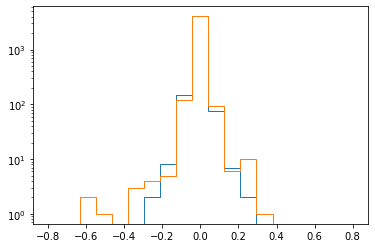

In [58]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[d['specZ_outlCoeff'].abs()<=1]
d=d[(d['resid_ML']<=limVal) & (d['resid_ML']>=-limVal)]
d=d[(d['resid_SED']<=limVal)&(d['resid_SED']>=-limVal)]
plt.hist(d['resid_ML'],bins=bins,histtype='step')
plt.hist(d['resid_SED'],bins=bins,histtype='step')
plt.yscale('log')

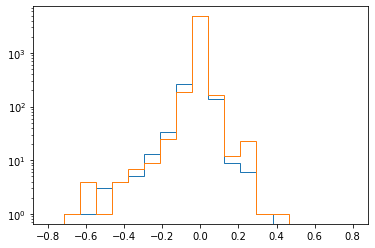

In [59]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[d['trainMapOccupation']>=5]
d=d[(d['resid_ML']<=limVal) & (d['resid_ML']>=-limVal)]
d=d[(d['resid_SED']<=limVal)&(d['resid_SED']>=-limVal)]
plt.hist(d['resid_ML'],bins=bins,histtype='step')
plt.hist(d['resid_SED'],bins=bins,histtype='step')
plt.yscale('log')

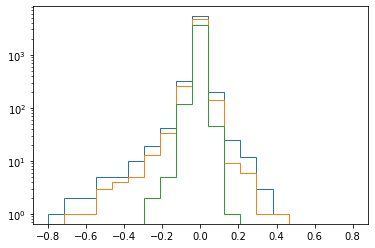

In [60]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[(d['resid_ML']<=limVal) & (d['resid_ML']>=-limVal)]
plt.hist(d['resid_ML'],bins=bins,histtype='step')

d=d[d['trainMapOccupation']>=5]
plt.hist(d['resid_ML'],bins=bins,histtype='step')

d=d[d['specZ_outlCoeff'].abs()<=1]
plt.hist(d['resid_ML'],bins=bins,histtype='step')
plt.yscale('log')

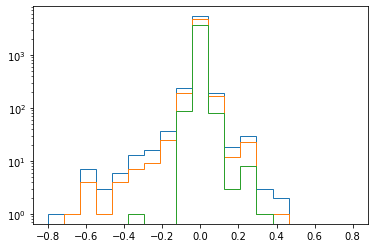

In [61]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[(d['resid_SED']<=limVal) & (d['resid_SED']>=-limVal)]
plt.hist(d['resid_SED'],bins=bins,histtype='step')

d=d[d['trainMapOccupation']>=5]
plt.hist(d['resid_SED'],bins=bins,histtype='step')

d=d[d['specZ_outlCoeff'].abs()<=1]
plt.hist(d['resid_SED'],bins=bins,histtype='step')
plt.yscale('log')

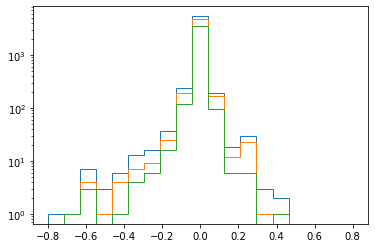

In [71]:
limVal=0.8
bins=lspace(-limVal,limVal,20)
d=test
d=d[(d['resid_SED']<=limVal) & (d['resid_SED']>=-limVal)]
plt.hist(d['resid_SED'],bins=bins,histtype='step')

d=d[d['trainMapOccupation']>=5]
plt.hist(d['resid_SED'],bins=bins,histtype='step')

d=d[d['photoZ_SED_outlCoeff'].abs()<=1]
plt.hist(d['resid_SED'],bins=bins,histtype='step')
plt.yscale('log')